In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

In [14]:
def stock_price_after_dt(s,mu, sigma, dt):
    mu_dt = mu*dt # Expected return after dt
    sigma_dt = sigma*np.sqrt(dt) # Expected standard deviation of returns after dt
    random_return_after_dt = mu_dt + np.random.randn()*sigma_dt # N(mu_dt, sigma_dt^2)
    return s + s * random_return_after_dt

Returns the price after dt

s --> Initial price

mu --> Expected return (mean rate of return over a year)

sigma --> Expected standard deviation of returns (volatility over a year)

dt --> Fraction of the time unit of mu and sigma over the time unit we want to step (usually 1/252)

In [15]:
def generate_sequence_of_prices(s, mu, sigma, dt=1/252, n=1):
    prices = [s] # list of prices
    for i in range (int(n/dt)):
        s = stock_price_after_dt(s, mu, sigma, dt)
        prices.append(s)
    return prices

Returns a sequence of prices spaced by dt for n periods
    
    s -> Initial price
    
    mu -> Expected return (mean rate of return over a year)
    
    sigma -> Expected standard deviation of returns (usually volatility over a year)
    
    dt -> Fraction of the time unit of mu and sigma over the time unit we want to step (usually 1/252)
    
    n -> Number of periods in the same time unit as mu and sigma (usually years)
    

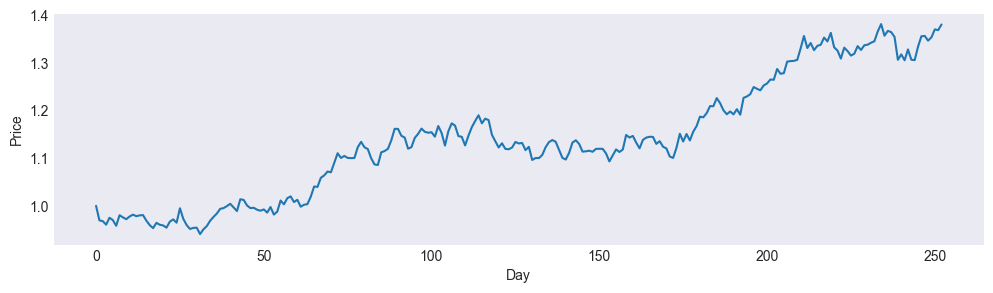

In [16]:
plt.figure(figsize=(12,3))
plt.xlabel('Day')
plt.ylabel('Price')

stock_sequence = generate_sequence_of_prices(s=1, mu=0.05, sigma=0.2) # one stock sequence

plt.grid()
plt.plot(stock_sequence)
plt.show()

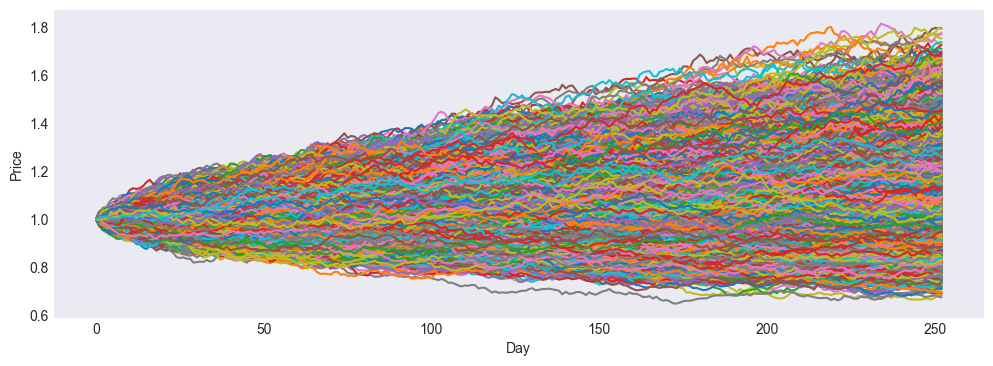

In [17]:
plt.figure(figsize=(12,4))
plt.grid()
plt.xlabel('Day')
plt.ylabel('Price')

stock_sequences = [generate_sequence_of_prices(s=1, mu=0.1027, sigma=0.124) for i in range (50000)] # 50,000 stock sequences

for stock_sequence in stock_sequences:
    plt.plot(stock_sequence)

plt.show()

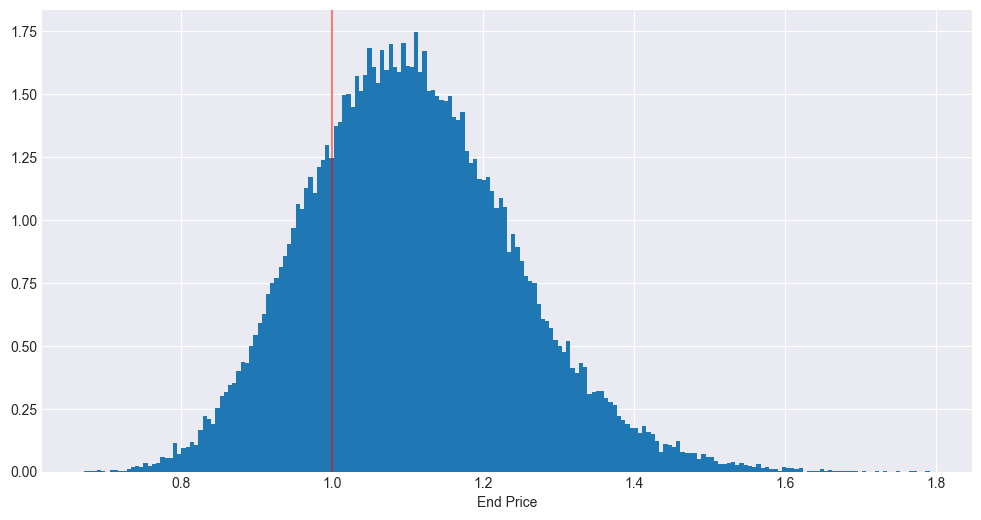

In [18]:
plt.figure(figsize=(12,6))
plt.xlabel("End Price")
plt.axvline(1, color='r', alpha=0.5)

end_prices = [stock_sequence[-1] for stock_sequence in stock_sequences]

hist, bin_edges = np.histogram(end_prices, bins=200)
percentages = hist / len(end_prices) * 100
plt.bar(bin_edges[:-1], percentages, width=(bin_edges[1]-bin_edges[0]))
plt.show()

In [19]:
range_min = 0.02
range_max = 4
num_bins = 25

# Create the bins
bins = np.linspace(range_min, range_max, num_bins)

# Count the number of end prices that fall into each bin
hist, _ = np.histogram(end_prices, bins=bins)

# Calculate the percentage of end prices that fall into each bin
percentages = hist / len(end_prices) * 100

# Print the results
for i in range(len(bins)-1):
    print(f"{bins[i]:.2f} - {bins[i+1]:.2f}: {percentages[i]:.2f}%")

0.02 - 0.19: 0.00%
0.19 - 0.35: 0.00%
0.35 - 0.52: 0.00%
0.52 - 0.68: 0.00%
0.68 - 0.85: 1.82%
0.85 - 1.01: 23.79%
1.01 - 1.18: 46.00%
1.18 - 1.35: 23.30%
1.35 - 1.51: 4.58%
1.51 - 1.68: 0.49%
1.68 - 1.84: 0.03%
1.84 - 2.01: 0.00%
2.01 - 2.18: 0.00%
2.18 - 2.34: 0.00%
2.34 - 2.51: 0.00%
2.51 - 2.67: 0.00%
2.67 - 2.84: 0.00%
2.84 - 3.00: 0.00%
3.00 - 3.17: 0.00%
3.17 - 3.34: 0.00%
3.34 - 3.50: 0.00%
3.50 - 3.67: 0.00%
3.67 - 3.83: 0.00%
3.83 - 4.00: 0.00%
